In [22]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [5]:
n_epochs = 100
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0
progress_bar_subsubprocess = True

retrain = False

In [6]:
tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)
n_epochs_vec = np.arange(1, 101, 1).tolist()
n_synthetic_datasets_epochs_comparison = 10

2022-03-10 10:08:35.995115: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_epochs_fast(
    tg_qtr,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder = "tabGAN-qtr",
    batch_size=batch_size,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    n_epochs_vec = n_epochs_vec,
    redo_n_epochs_vec=[],
    restart = False)

In [ ]:
result_n_epochs = utils.hp_tuning.evaluate_n_epochs_through_prediction(
    data_train=data_train,
    data_test=data_test,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder="tabGAN-qtr",
    n_epochs_vec = n_epochs_vec,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_epochs.svg",
    legend_pos="lower right"
)

In [ ]:
#result_n_epochs

In [5]:
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
n_synthetic_datasets_lr_comparison = 10
n_epochs_lr = 100

def create_tabGAN_for_lr(opt_lr):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_lr,
    hyperparams_vec=lr_vec,
    n_epochs=n_epochs_lr,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "learning_rate",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/110 [00:00<?, ?it/s]

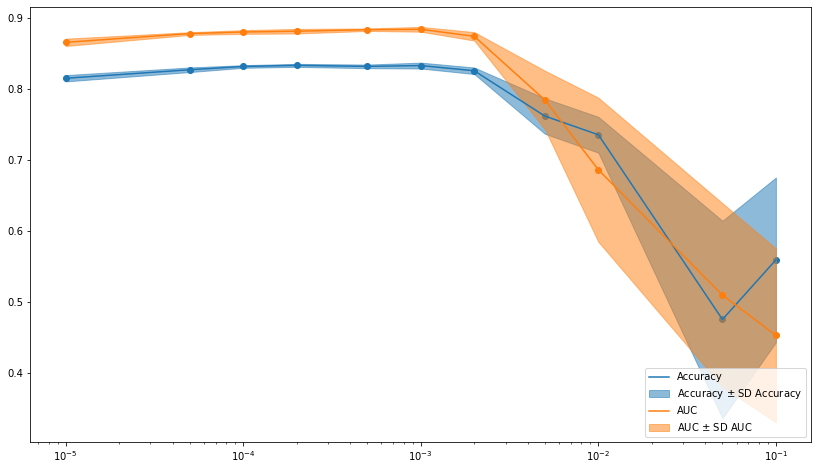

In [12]:
result_lr = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=lr_vec,
    hyperparams_name = "learning_rate",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_lr.svg",
    legend_pos="lower right",
    x_scale="log",
    incl_comparison_folder=True
)

In [13]:
result_lr

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,learning_rate_0.1,0.559329,0.453252,0.115768,0.122132
1,learning_rate_0.05,0.475578,0.509895,0.138740,0.129101
2,learning_rate_0.01,0.735219,0.686055,0.025204,0.101284
3,learning_rate_0.005,0.761448,0.784127,0.024862,0.041137
4,learning_rate_0.002,0.825139,0.873567,0.004577,0.005957
5,learning_rate_0.001,0.832457,0.883441,0.004156,0.003381
6,learning_rate_0.0005,0.831321,0.882893,0.002537,0.001741
7,learning_rate_0.0002,0.832736,0.880764,0.002117,0.003232
8,learning_rate_0.0001,0.831162,0.879639,0.001866,0.002592
9,learning_rate_5e-05,0.826580,0.877448,0.003239,0.001924


In [9]:
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
n_synthetic_datasets_adam_beta1_comparison = 10
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta1,
    hyperparams_vec=adam_beta1_vec,
    n_epochs=n_epochs_adam_beta1,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta1_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta1",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/110 [00:00<?, ?it/s]

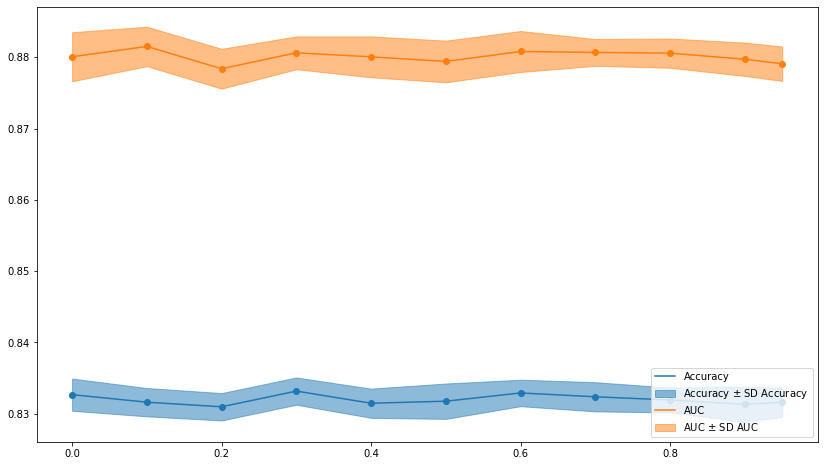

In [11]:
result_adam_beta1 = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta1_vec,
    hyperparams_name = "adam_beta1",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta1_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta1.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [72]:
result_adam_beta1

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta1_0,0.833639,0.881278,0.002455,0.004128
1,adam_beta1_0.1,0.832789,0.882001,0.001124,0.003088
2,adam_beta1_0.2,0.830784,0.879345,0.001672,0.002553
3,adam_beta1_0.3,0.833785,0.880704,0.001461,0.002446
4,adam_beta1_0.4,0.832098,0.879639,0.001296,0.003625
5,adam_beta1_0.5,0.831700,0.879993,0.002079,0.002480
6,adam_beta1_0.6,0.832975,0.882811,0.001500,0.001176
7,adam_beta1_0.7,0.833201,0.880946,0.001941,0.001423
8,adam_beta1_0.8,0.831036,0.880944,0.002132,0.000885
9,adam_beta1_0.9,0.830478,0.878985,0.003406,0.002928


In [12]:
adam_beta2_vec = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999]
n_synthetic_datasets_adam_beta2_comparison = 10
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta2,
    hyperparams_vec=adam_beta2_vec,
    n_epochs=n_epochs_adam_beta2,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta2",
    add_comparison_folder=True,
    overwrite_dataset=False
)

  0%|          | 0/120 [00:00<?, ?it/s]

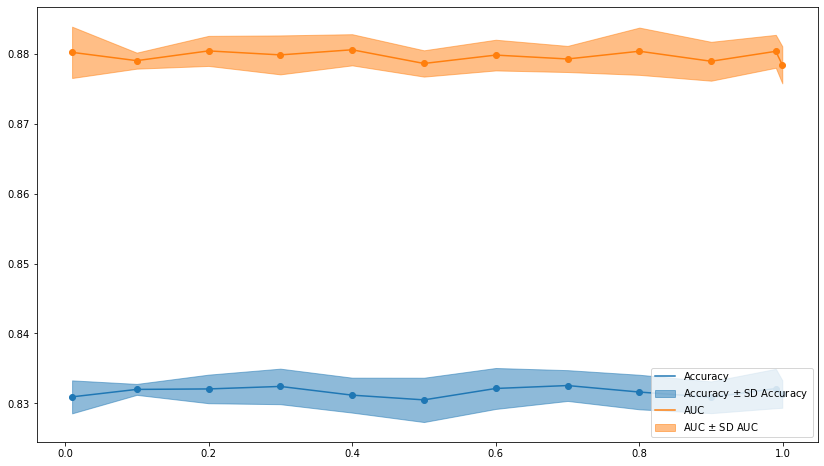

In [13]:
result_adam_beta2 = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta2_vec,
    hyperparams_name = "adam_beta2",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta2.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False,
)

In [14]:
result_adam_beta2

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta2_0.01,0.830923,0.880237,0.002359,0.003672
1,adam_beta2_0.1,0.831992,0.879047,0.000783,0.001146
2,adam_beta2_0.2,0.832058,0.880443,0.002044,0.002150
3,adam_beta2_0.3,0.832417,0.879872,0.002542,0.002786
4,adam_beta2_0.4,0.831169,0.880603,0.002499,0.002230
5,adam_beta2_0.5,0.830491,0.878645,0.003171,0.001881
6,adam_beta2_0.6,0.832125,0.879844,0.002930,0.002197
7,adam_beta2_0.7,0.832543,0.879288,0.002204,0.001868
8,adam_beta2_0.8,0.831614,0.880396,0.002472,0.003382
9,adam_beta2_0.9,0.830863,0.878960,0.002269,0.002782


In [8]:
n_critic_vec = np.arange(1,26)
n_synthetic_datasets_n_critic_comparison = 10
n_epochs_n_critic = 100

def create_tabGAN_for_n_critic(n_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_critic,
    hyperparams_vec=n_critic_vec,
    n_epochs=n_epochs_n_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/250 [00:00<?, ?it/s]

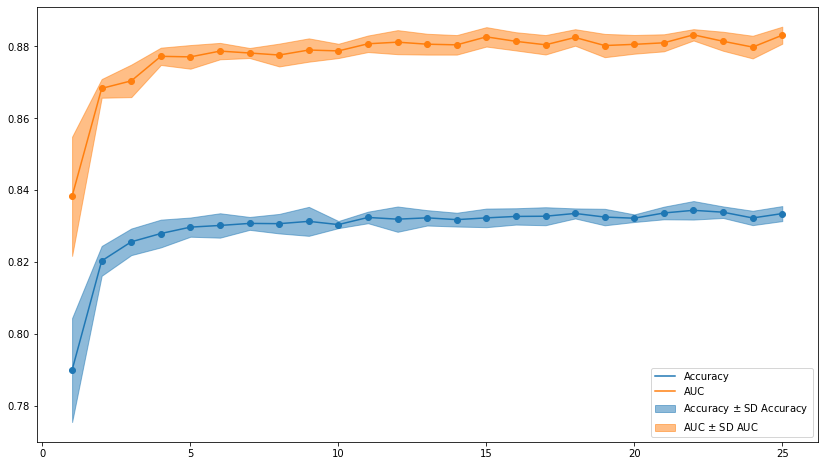

In [20]:
result_n_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_critic_vec,
    hyperparams_name = "n_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [22]:
#result_n_critic

In [22]:
qtr_spread_vec = np.round(np.linspace(0, 1, 21),2)
n_synthetic_datasets_qtr_spread_comparison = 10
n_epochs_qtr_spread = 100

def create_tabGAN_for_qtr_spread(qtr_spread):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_spread=qtr_spread)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_spread,
    hyperparams_vec=qtr_spread_vec,
    n_epochs=n_epochs_qtr_spread,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_spread_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_spread",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    overwrite_dataset=False
)

  0%|          | 0/210 [00:00<?, ?it/s]

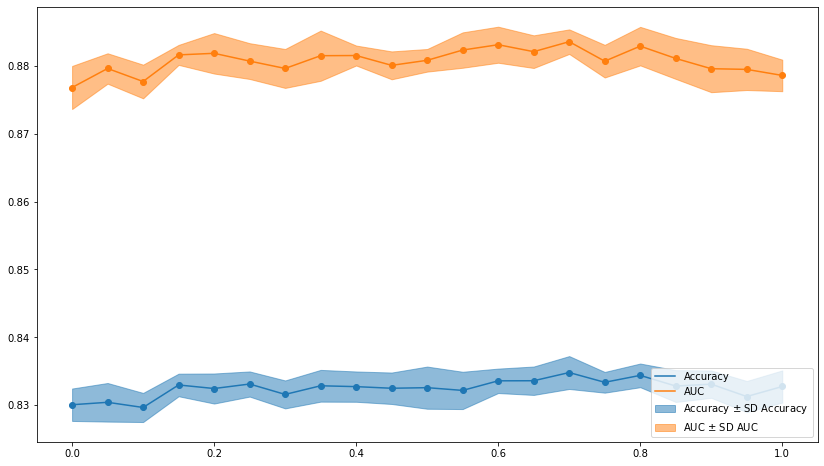

In [23]:
result_qtr_spread = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_spread_vec,
    hyperparams_name = "qtr_spread",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_spread_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_qtr_spread.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [73]:
#result_qtr_spread

In [6]:
gumbel_temp_vec = np.round(np.linspace(0.001, 0.009, 9), 4).tolist()
gumbel_temp_vec += np.round(np.linspace(0.01, 0.19, 19), 3).tolist()
gumbel_temp_vec += np.round(np.linspace(0.2, 2, 19),2).tolist()
n_synthetic_datasets_gumbel_temp_comparison = 10
n_epochs_gumbel_temp = 100

def create_tabGAN_for_gumbel_temp(gumbel_temp):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     gumbel_temperature=gumbel_temp)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gumbel_temp,
    hyperparams_vec=gumbel_temp_vec,
    n_epochs=n_epochs_gumbel_temp,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gumbel_temp_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "gumbel_temp",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/470 [00:00<?, ?it/s]

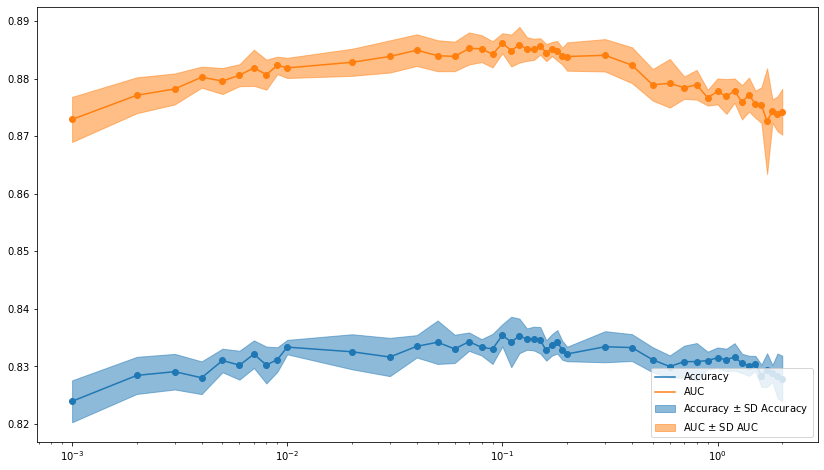

In [7]:
result_gumbel_temp = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gumbel_temp_vec,
    hyperparams_name = "gumbel_temp",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gumbel_temp_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_gumbel_temp.svg",
    legend_pos="lower right",
    x_scale="log",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [74]:
#result_gumbel_temp

In [16]:
qtr_lbound_apply_vec = np.round(np.linspace(0.02, 0.2, 10),2).tolist() + np.round(np.linspace(0.002, 0.01, 5),3).tolist()
n_synthetic_datasets_qtr_lbound_apply_comparison = 10
n_epochs_qtr_lbound_apply = 100

def create_tabGAN_for_qtr_lbound_apply(qtr_lbound_apply):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     qtr_lbound_apply=qtr_lbound_apply)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_qtr_lbound_apply,
    hyperparams_vec=qtr_lbound_apply_vec,
    n_epochs=n_epochs_qtr_lbound_apply,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_qtr_lbound_apply_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "qtr_lbound_apply",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/150 [00:00<?, ?it/s]

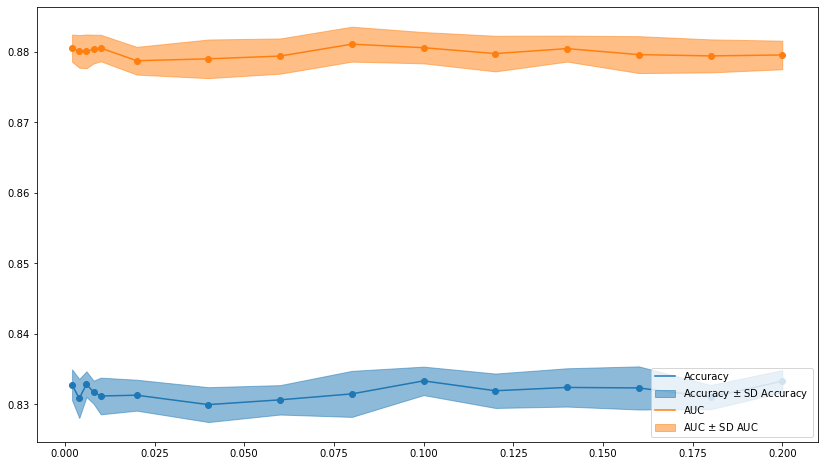

In [22]:
result_qtr_lbound_apply = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=qtr_lbound_apply_vec,
    hyperparams_name = "qtr_lbound_apply",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_qtr_lbound_apply_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_qtr_lbound_apply.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=False
)

In [19]:
result_qtr_lbound_apply

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,qtr_lbound_apply_0.02,0.831308,0.878738,0.002194,0.001968
1,qtr_lbound_apply_0.04,0.829973,0.879007,0.002470,0.002740
2,qtr_lbound_apply_0.06,0.830651,0.879398,0.002087,0.002500
3,qtr_lbound_apply_0.08,0.831494,0.881086,0.003265,0.002478
4,qtr_lbound_apply_0.1,0.833340,0.880582,0.002019,0.002217
5,qtr_lbound_apply_0.12,0.831939,0.879752,0.002440,0.002528
6,qtr_lbound_apply_0.14,0.832410,0.880455,0.002717,0.001844
7,qtr_lbound_apply_0.16,0.832337,0.879604,0.003058,0.002616
8,qtr_lbound_apply_0.18,0.831042,0.879423,0.001716,0.002343
9,qtr_lbound_apply_0.2,0.833293,0.879553,0.001578,0.002025


In [20]:
dim_hidden_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_hidden_comparison = 10
n_epochs_dim_hidden = 100

def create_tabGAN_for_dim_hidden(dim_hidden):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_hidden=dim_hidden)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_hidden,
    hyperparams_vec=dim_hidden_vec,
    n_epochs=n_epochs_dim_hidden,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_hidden_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_hidden",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
)

  0%|          | 0/110 [00:00<?, ?it/s]

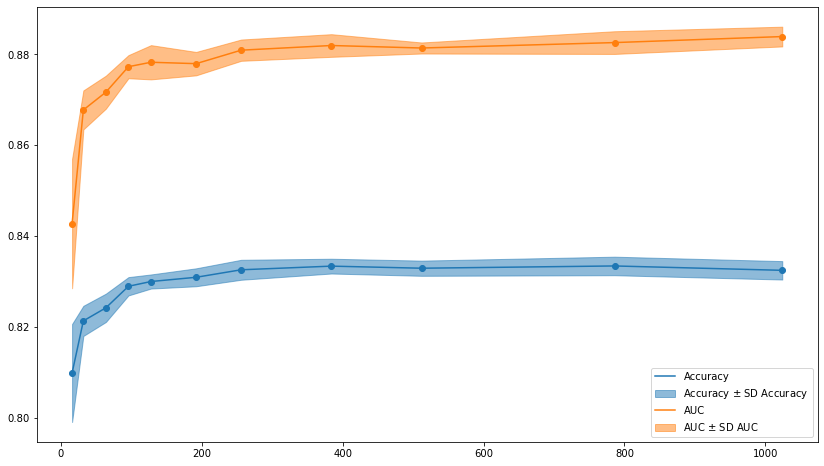

In [21]:
result_dim_hidden = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_hidden_vec,
    hyperparams_name = "dim_hidden",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_hidden_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dim_hidden.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [23]:
result_dim_hidden

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,dim_hidden_16,0.809841,0.842751,0.010797,0.014245
1,dim_hidden_32,0.821315,0.867768,0.003319,0.004293
2,dim_hidden_64,0.824197,0.871687,0.003120,0.003631
3,dim_hidden_96,0.828938,0.877291,0.002017,0.002547
4,dim_hidden_128,0.829987,0.878267,0.001554,0.003771
5,dim_hidden_192,0.830916,0.877959,0.001975,0.002579
6,dim_hidden_256,0.832570,0.880928,0.002199,0.002342
7,dim_hidden_384,0.833373,0.881955,0.001628,0.002494
8,dim_hidden_512,0.832915,0.881405,0.001675,0.001216
9,dim_hidden_786,0.833413,0.882599,0.002041,0.002499


In [114]:
dim_latent_vec = [16, 32, 64, 96, 128, 192, 256, 384, 512, 786, 1024]
n_synthetic_datasets_dim_latent_comparison = 10
n_epochs_dim_latent = 100

def create_tabGAN_for_dim_latent(dim_latent):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     dim_latent=dim_latent)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dim_latent,
    hyperparams_vec=dim_latent_vec,
    n_epochs=n_epochs_dim_latent,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dim_latent_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dim_latent",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/110 [00:00<?, ?it/s]

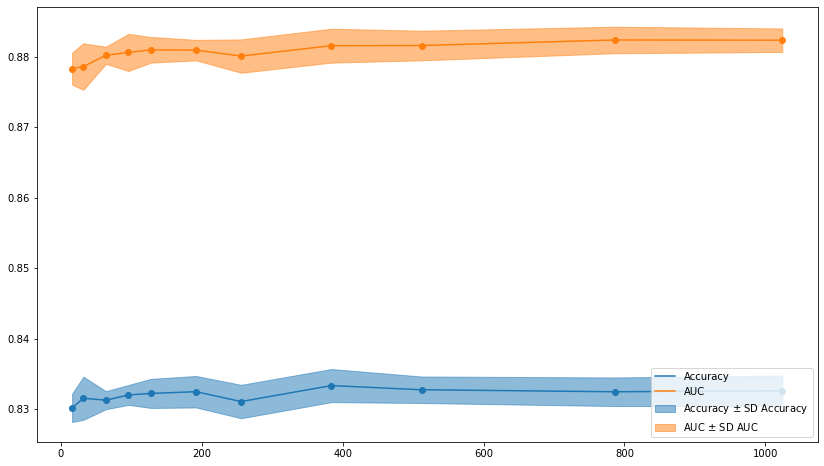

In [125]:
result_dim_latent = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dim_latent_vec,
    hyperparams_name = "dim_latent",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dim_latent_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dim_latent.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_dim_latent

In [134]:
wgan_lambda_vec = np.arange(0,11, 1).tolist() + np.arange(12,21,2).tolist()
n_synthetic_datasets_wgan_lambda_comparison = 10
n_epochs_wgan_lambda = 100

def create_tabGAN_for_wgan_lambda(wgan_lambda):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     wgan_lambda=wgan_lambda)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_wgan_lambda,
    hyperparams_vec=wgan_lambda_vec,
    n_epochs=n_epochs_wgan_lambda,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_wgan_lambda_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "wgan_lambda",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/160 [00:00<?, ?it/s]

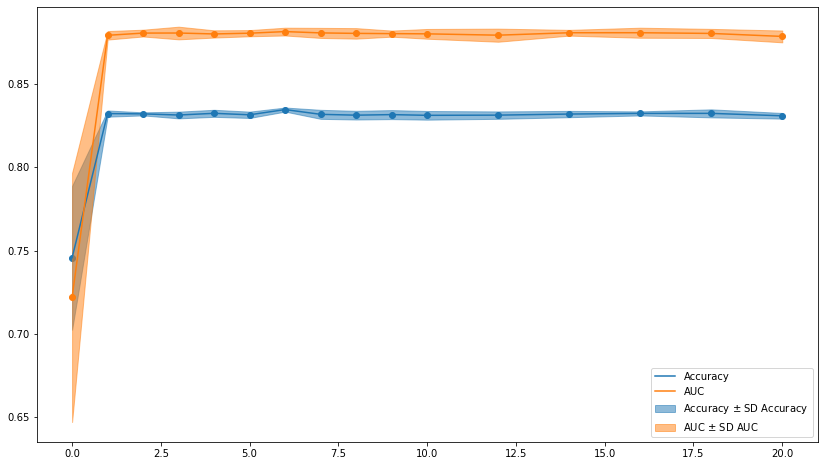

In [135]:
result_wgan_lambda = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=wgan_lambda_vec,
    hyperparams_name = "wgan_lambda",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_wgan_lambda_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_wgan_lambda.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [ ]:
result_wgan_lambda

In [127]:
n_quantiles_int_vec = [10, 50, 100, 250, 500, 750, 1000, 2500, 5000, 10000]
n_synthetic_datasets_n_quantiles_int_comparison = 10
n_epochs_n_quantiles_int = 100

def create_tabGAN_for_n_quantiles_int(n_quantiles_int):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     n_quantiles_int=n_quantiles_int)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_quantiles_int,
    hyperparams_vec=n_quantiles_int_vec,
    n_epochs=n_epochs_n_quantiles_int,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_quantiles_int_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_quantiles_int",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/100 [00:00<?, ?it/s]

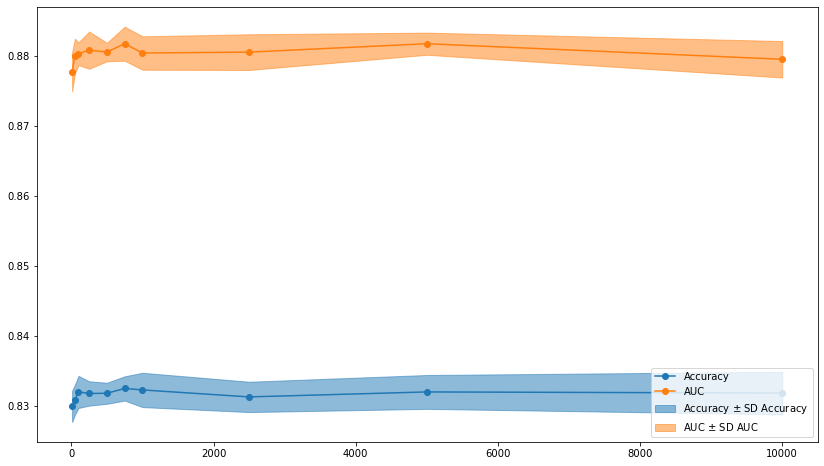

In [155]:
result_n_quantiles_int = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_quantiles_int_vec,
    hyperparams_name = "n_quantiles_int",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_quantiles_int_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_quantiles_int.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [156]:
result_n_quantiles_int

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,n_quantiles_int_10,0.829947,0.877735,0.002236,0.002787
1,n_quantiles_int_50,0.830903,0.880001,0.002145,0.002495
2,n_quantiles_int_100,0.832012,0.880346,0.002294,0.001619
3,n_quantiles_int_250,0.831793,0.880850,0.001739,0.002662
4,n_quantiles_int_500,0.831819,0.880581,0.001504,0.001318
5,n_quantiles_int_750,0.832510,0.881768,0.001734,0.002435
6,n_quantiles_int_1000,0.832297,0.880441,0.002453,0.002387
7,n_quantiles_int_2500,0.831301,0.880570,0.002167,0.002551
8,n_quantiles_int_5000,0.832012,0.881770,0.002419,0.001583
9,n_quantiles_int_10000,0.831853,0.879547,0.003042,0.002606


In [7]:
n_hidden_layers_vec = [1,2,3,4,5]
n_synthetic_datasets_n_hidden_layers_comparison = 10
n_epochs_n_hidden_layers = 100

def create_tabGAN_for_n_hidden_layers(n_hidden_layers):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     n_hidden_layers=n_hidden_layers)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_hidden_layers,
    hyperparams_vec=n_hidden_layers_vec,
    n_epochs=n_epochs_n_hidden_layers,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_hidden_layers_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_hidden_layers",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

Hyperparameters subfolder creation:   0%|          | 0/5 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

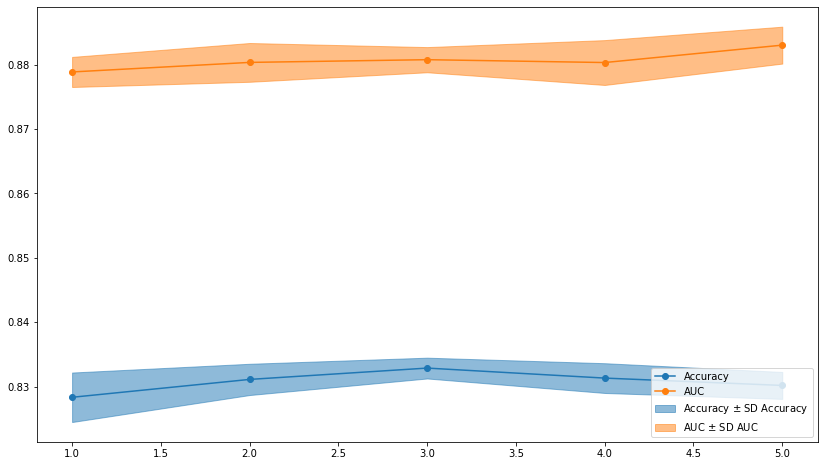

In [32]:
result_n_hidden_layers = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_hidden_layers_vec,
    hyperparams_name = "n_hidden_layers",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_hidden_layers_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_hidden_layers.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [33]:
result_n_hidden_layers

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,n_hidden_layers_1,0.828333,0.878858,0.003844,0.002336
1,n_hidden_layers_2,0.831109,0.880341,0.002427,0.003012
2,n_hidden_layers_3,0.832869,0.880763,0.001615,0.001954
3,n_hidden_layers_4,0.831315,0.880320,0.002311,0.003483
4,n_hidden_layers_5,0.830173,0.883022,0.002091,0.002865


In [83]:
batch_size_vec = [50, 100, 250, 500, 750, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_comparison = 10
n_epochs_batch_size = 100

def create_tabGAN_for_batch_size(batch_size):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     batch_size=batch_size)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size,
    hyperparams_vec=batch_size_vec,
    n_epochs=n_epochs_batch_size,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/80 [00:00<?, ?it/s]

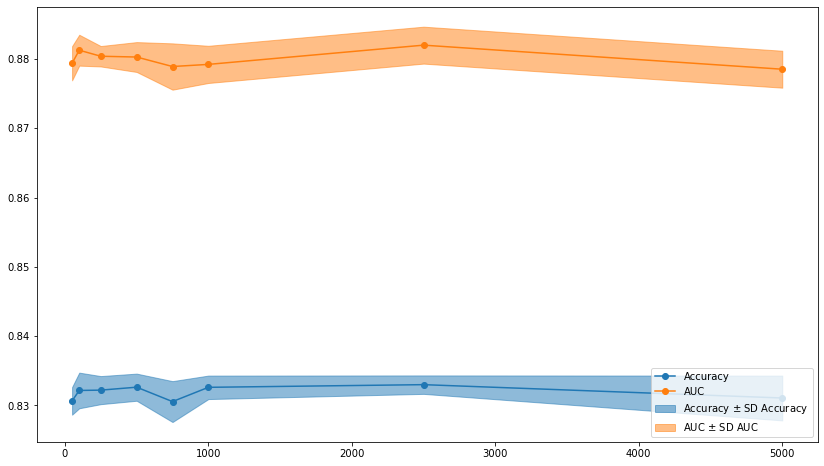

In [84]:
result_batch_size = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_vec,
    hyperparams_name = "batch_size",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_batch_size.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [73]:
result_batch_size

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_50,0.830651,0.879375,0.001990,0.002466
1,batch_size_100,0.832158,0.881258,0.002571,0.002228
2,batch_size_250,0.832205,0.880385,0.002026,0.001474
3,batch_size_500,0.832629,0.880273,0.001958,0.002155
4,batch_size_750,0.830551,0.878902,0.002951,0.003343
5,batch_size_1000,0.832610,0.879210,0.001694,0.002683
6,batch_size_2500,0.832995,0.881987,0.001332,0.002664
7,batch_size_5000,0.831069,0.878514,0.003233,0.002665


In [18]:
batch_size_300_epochs_vec = [50, 100, 250, 500, 750, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_300_epochs_comparison = 10
n_epochs_batch_size_300_epochs = 300

def create_tabGAN_for_batch_size_300_epochs(batch_size_300_epochs):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                     batch_size=batch_size_300_epochs)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size_300_epochs,
    hyperparams_vec=batch_size_300_epochs_vec,
    n_epochs=n_epochs_batch_size_300_epochs,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_300_epochs_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size_300_epochs",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/80 [00:00<?, ?it/s]

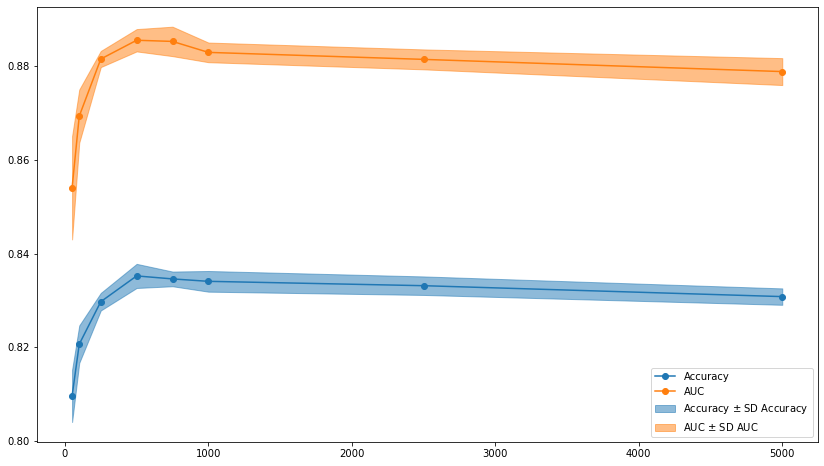

In [33]:
result_batch_size_300_epochs = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_300_epochs_vec,
    hyperparams_name = "batch_size_300_epochs",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_300_epochs_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_batch_size_300_epochs.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [34]:
result_batch_size_300_epochs

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_300_epochs_50,0.809582,0.854027,0.005570,0.011016
1,batch_size_300_epochs_100,0.820644,0.869345,0.003997,0.005666
2,batch_size_300_epochs_250,0.829708,0.881534,0.001874,0.001723
3,batch_size_300_epochs_500,0.835212,0.885538,0.002576,0.002384
4,batch_size_300_epochs_750,0.834575,0.885291,0.001570,0.003145
5,batch_size_300_epochs_1000,0.834057,0.882949,0.002208,0.002097
6,batch_size_300_epochs_2500,0.833127,0.881454,0.001977,0.002128
7,batch_size_300_epochs_5000,0.830797,0.878849,0.001753,0.002872


In [15]:
noise_discrete_unif_max_vec = np.round(np.arange(0, 0.41, 0.01), 3).tolist() + [0.005]
n_synthetic_datasets_noise_discrete_unif_max_comparison = 10
n_epochs_noise_discrete_unif_max = 100

def create_tabGAN_for_noise_discrete_unif_max(noise_discrete_unif_max):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_noise_discrete_unif_max,
    hyperparams_vec=noise_discrete_unif_max_vec,
    n_epochs=n_epochs_noise_discrete_unif_max,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_noise_discrete_unif_max_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "noise_discrete_unif_max",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/420 [00:00<?, ?it/s]

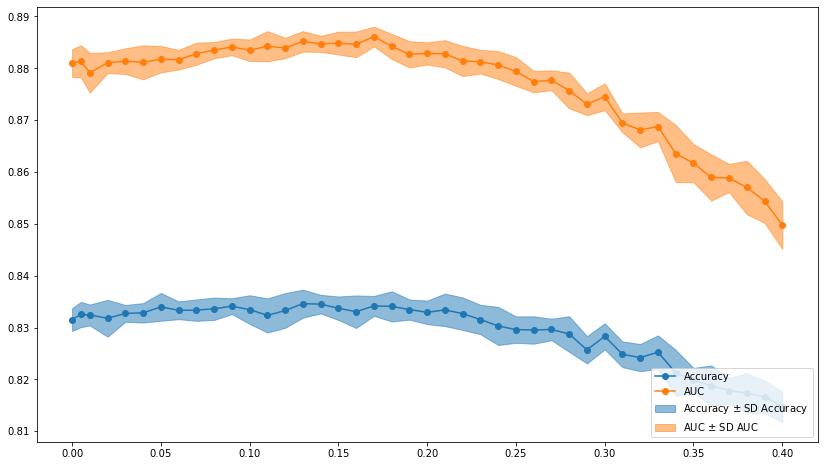

In [16]:
result_noise_discrete_unif_max = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=noise_discrete_unif_max_vec,
    hyperparams_name = "noise_discrete_unif_max",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_noise_discrete_unif_max_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_noise_discrete_unif_max.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [17]:
result_noise_discrete_unif_max

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,noise_discrete_unif_max_0.0,0.831541,0.881006,0.002210,0.002679
1,noise_discrete_unif_max_0.005,0.832510,0.881329,0.002429,0.003116
2,noise_discrete_unif_max_0.01,0.832410,0.879142,0.002020,0.003825
3,noise_discrete_unif_max_0.02,0.831786,0.881082,0.003554,0.001996
4,noise_discrete_unif_max_0.03,0.832722,0.881374,0.001627,0.002484
5,noise_discrete_unif_max_0.04,0.832829,0.881153,0.001878,0.003269
6,noise_discrete_unif_max_0.05,0.833977,0.881751,0.002682,0.002539
7,noise_discrete_unif_max_0.06,0.833320,0.881659,0.001715,0.001899
8,noise_discrete_unif_max_0.07,0.833353,0.882804,0.002066,0.002121
9,noise_discrete_unif_max_0.08,0.833612,0.883500,0.002155,0.001562


In [22]:
adam_beta1_vec_partial = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
adam_beta2_vec_partial = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.999]
amsgrad_vec_partial = [False, True]
adam_betas_vec = [(beta1, beta2, amsgrad) for beta1 in adam_beta1_vec_partial for beta2 in adam_beta2_vec_partial
                  for amsgrad in amsgrad_vec_partial]
n_synthetic_datasets_adam_betas_comparison = 10
n_epochs_adam_betas = 100

def create_tabGAN_for_adam_betas(adam_beta1, adam_beta2, adam_amsgrad):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1, adam_amsgrad=adam_amsgrad,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr
small_adam_betas_vec = (0.5, 0.5, True), (0.5, 0.7, False), (0.5, 0.7, True), (0.5, 0.9, False)

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_betas,
    hyperparams_vec=adam_betas_vec,
    n_epochs=n_epochs_adam_betas,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_betas_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/840 [00:00<?, ?it/s]

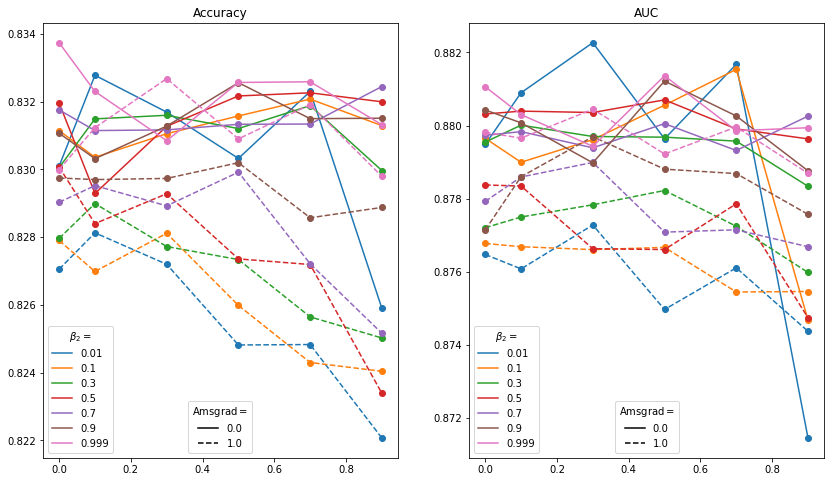

In [24]:
result_adam_betas = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec= adam_betas_vec,
    hyperparams_name = "adam",
    hyperparams_subname = ["beta1", "beta2", "amsgrad"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_betas_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_betas.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"$\beta_2=$", r"Amsgrad$=$"],
    separate_legends=True
)

In [350]:
result_adam_betas

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta1_0_beta2_0.01_amsgrad_False,0.830093,0.879484,0.002485,0.003470
1,adam_beta1_0_beta2_0.01_amsgrad_True,0.827052,0.876474,0.002413,0.002283
2,adam_beta1_0_beta2_0.1_amsgrad_False,0.831149,0.879652,0.002262,0.003456
3,adam_beta1_0_beta2_0.3_amsgrad_False,0.830053,0.879548,0.002680,0.002575
4,adam_beta1_0_beta2_0.5_amsgrad_False,0.831965,0.880317,0.002794,0.002532
...,...,...,...,...,...
60,adam_beta1_0.9_beta2_0.5_amsgrad_True,0.823386,0.874744,0.003538,0.003868
61,adam_beta1_0.9_beta2_0.7_amsgrad_False,0.832450,0.880258,0.001671,0.002018
62,adam_beta1_0.9_beta2_0.9_amsgrad_False,0.831514,0.878763,0.002626,0.002693
63,adam_beta1_0.9_beta2_0.999_amsgrad_False,0.831321,0.879941,0.001835,0.002706


In [164]:
sgd_momentum_vec_partial = np.round(np.linspace(0, 0.9, 10), 2).tolist() + [0.95, 0.99]
sgd_nesterov_vec_partial = [False, True]
sgd_vec = [(sgd_momentum, sgd_nesterov) for sgd_momentum in sgd_momentum_vec_partial for sgd_nesterov in sgd_nesterov_vec_partial]
n_synthetic_datasets_sgd_comparison = 10
n_epochs_sgd = 100

def create_tabGAN_for_sgd(sgd_momentum, sgd_nesterov):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="sgd", opt_lr = opt_lr, sgd_momentum=sgd_momentum,
                      sgd_nesterov=sgd_nesterov, quantile_transformation_int = True,
                      quantile_rand_transformation = True, noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_sgd,
    hyperparams_vec=sgd_vec,
    n_epochs=n_epochs_sgd,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_sgd_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/240 [00:00<?, ?it/s]

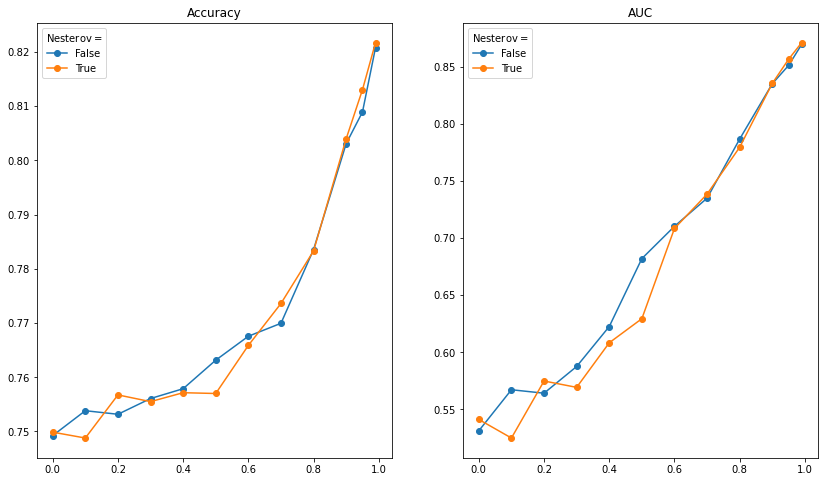

In [176]:
result_sgd = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=sgd_vec,
    hyperparams_name = "sgd",
    hyperparams_subname = ["momentum", "nesterov"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_sgd_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_sgd.svg",
    legend_pos="best",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= r"Nesterov$=$"
)

In [175]:
result_sgd

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,sgd_momentum_0.0_nesterov_False,0.749236,0.531203,0.006492,0.061608
1,sgd_momentum_0.0_nesterov_True,0.749867,0.541107,0.004059,0.063515
2,sgd_momentum_0.1_nesterov_False,0.753825,0.567152,0.007042,0.060533
3,sgd_momentum_0.1_nesterov_True,0.748785,0.524835,0.003515,0.066110
4,sgd_momentum_0.2_nesterov_False,0.753167,0.564114,0.006158,0.064437
5,sgd_momentum_0.2_nesterov_True,0.756740,0.574804,0.005475,0.041327
6,sgd_momentum_0.3_nesterov_False,0.756069,0.587535,0.002356,0.045462
7,sgd_momentum_0.3_nesterov_True,0.755498,0.569240,0.005080,0.045044
8,sgd_momentum_0.4_nesterov_False,0.757882,0.622541,0.003153,0.030449
9,sgd_momentum_0.4_nesterov_True,0.757145,0.608299,0.006108,0.092067


In [65]:
rmsprop_rho_vec_partial = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
rmsprop_momentum_vec_partial = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.999]
rmsprop_centered_vec_partial = [False, True]
rmsprop_vec = [(rho, momentum, centered) for rho in rmsprop_rho_vec_partial for momentum in rmsprop_momentum_vec_partial
                  for centered in rmsprop_centered_vec_partial]
n_synthetic_datasets_rmsprop_comparison = 10
n_epochs_rmsprop = 100

def create_tabGAN_for_rmsprop(rmsprop_rho, rmsprop_momentum, rmsprop_centered):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, rmsprop_rho = rmsprop_rho, rmsprop_centered=rmsprop_centered,
                      rmsprop_momentum=rmsprop_momentum, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_rmsprop,
    hyperparams_vec=rmsprop_vec,
    n_epochs=n_epochs_rmsprop,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_rmsprop_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "rmsprop",
    hyperparams_subname = ["rho", "momentum", "centered"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/980 [00:00<?, ?it/s]

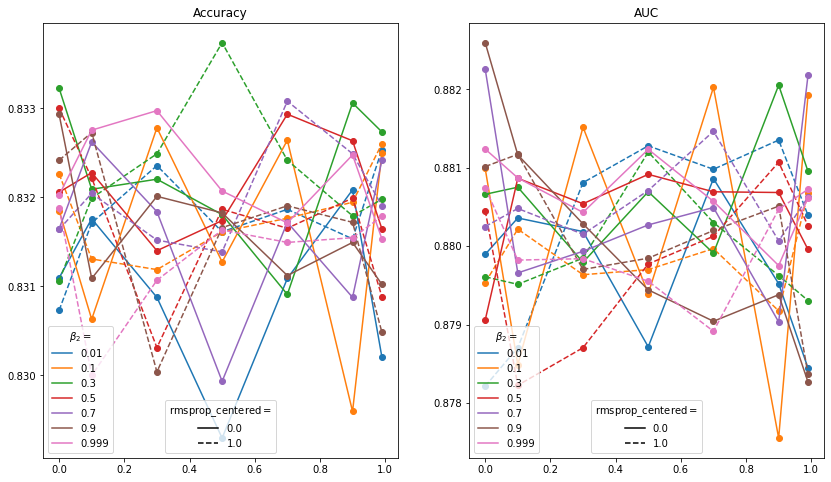

In [66]:
result_rmsprop = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec= rmsprop_vec,
    hyperparams_name = "rmsprop",
    hyperparams_subname = ["rho", "momentum", "centered"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_rmsprop_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_rmsprop.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"$\beta_2=$", r"rmsprop_centered$=$"],
    separate_legends=True
)

In [67]:
result_rmsprop.sort_values("Accuracy")

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
42,rmsprop_rho_0.5_momentum_0.01_centered_False,0.829296,0.878718,0.003149,0.002395
72,rmsprop_rho_0.9_momentum_0.1_centered_False,0.829595,0.877556,0.003326,0.002983
50,rmsprop_rho_0.5_momentum_0.7_centered_False,0.829934,0.880271,0.003442,0.003237
27,rmsprop_rho_0.1_momentum_0.999_centered_True,0.830000,0.879823,0.002841,0.003874
39,rmsprop_rho_0.3_momentum_0.9_centered_True,0.830040,0.879704,0.002188,0.001715
...,...,...,...,...,...
7,rmsprop_rho_0_momentum_0.5_centered_True,0.833001,0.880453,0.002901,0.003143
74,rmsprop_rho_0.9_momentum_0.3_centered_False,0.833061,0.882052,0.002099,0.002299
65,rmsprop_rho_0.7_momentum_0.7_centered_True,0.833081,0.881464,0.003148,0.003078
4,rmsprop_rho_0_momentum_0.3_centered_False,0.833227,0.880661,0.002753,0.002591


In [35]:
gan_architecture_dim_hidden_vec_partial = [16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
gan_architecture_dim_latent_vec_partial = [16, 32, 64, 96, 128, 192, 256, 384, 512, 768, 1024]
gan_architecture_n_hidden_layers = [2]
gan_architecture_vec = [(dim_hidden, dim_latent, n_hidden_layers)
                        for dim_hidden in gan_architecture_dim_hidden_vec_partial
                        for dim_latent in gan_architecture_dim_latent_vec_partial
                        for n_hidden_layers in gan_architecture_n_hidden_layers]
n_synthetic_datasets_gan_architecture_comparison = 10
n_epochs_gan_architecture = 100

def create_tabGAN_for_gan_architecture(dim_hidden, dim_latent, n_hidden_layers):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="adam", opt_lr = opt_lr,
                    dim_hidden=dim_hidden, dim_latent=dim_latent, n_hidden_layers = n_hidden_layers,
                    quantile_transformation_int = True, quantile_rand_transformation = True,
                    noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_gan_architecture,
    hyperparams_vec=gan_architecture_vec,
    n_epochs=n_epochs_gan_architecture,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_gan_architecture_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "gan_architecture",
    hyperparams_subname = ["dim_hidden", "dim_latent", "n_hidden_layers"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True
)

  0%|          | 0/1210 [00:00<?, ?it/s]

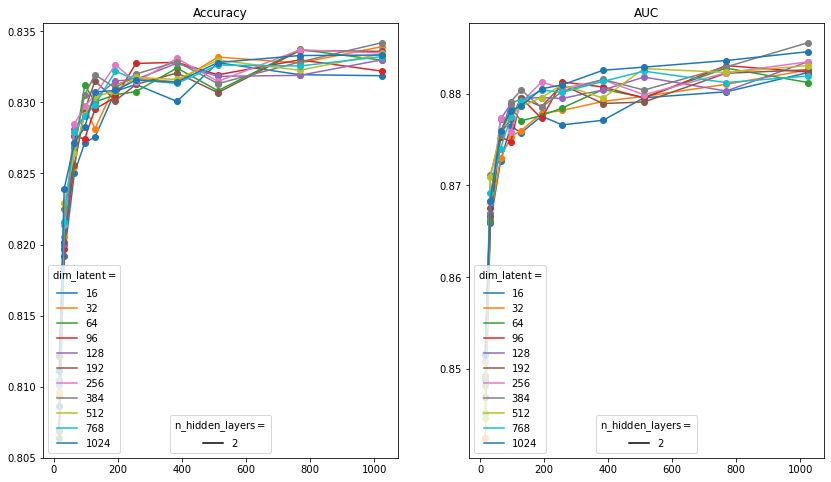

In [36]:
result_gan_architecture = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=gan_architecture_vec,
    hyperparams_name = "gan_architecture",
    hyperparams_subname = ["dim_hidden", "dim_latent", "n_hidden_layers"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_gan_architecture_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_gan_architecture.svg",
    legend_pos=["lower left", "lower center"],
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= [r"dim_latent$=$", r"n_hidden_layers$=$"],
    separate_legends=True
)

In [37]:
result_gan_architecture

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,gan_architecture_dim_hidden_16_dim_latent_16_n...,0.808632,0.848776,0.004959,0.010168
1,gan_architecture_dim_hidden_16_dim_latent_32_n...,0.809369,0.842491,0.006207,0.009943
2,gan_architecture_dim_hidden_16_dim_latent_64_n...,0.806388,0.845175,0.008838,0.011829
3,gan_architecture_dim_hidden_16_dim_latent_96_n...,0.812171,0.851599,0.008107,0.009095
4,gan_architecture_dim_hidden_16_dim_latent_128_...,0.810498,0.849298,0.008651,0.015974
...,...,...,...,...,...
116,gan_architecture_dim_hidden_1024_dim_latent_25...,0.833473,0.883468,0.002011,0.003109
117,gan_architecture_dim_hidden_1024_dim_latent_38...,0.834203,0.885551,0.001840,0.002090
118,gan_architecture_dim_hidden_1024_dim_latent_51...,0.833420,0.883056,0.003222,0.001539
119,gan_architecture_dim_hidden_1024_dim_latent_76...,0.833220,0.881923,0.002613,0.002845


In [106]:
noise_discrete_unif_max_vec_partial = np.arange(0, 0.21, 0.01).tolist() + [0.001, 0.003, 0.005, 0.007, 0.015, 0.025]
gumbel_temp_vec_partial = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1]
noise_and_gumbel_temp_vec = [(noise_discrete_unif_max, gumbel_temp)
                        for noise_discrete_unif_max in noise_discrete_unif_max_vec_partial
                        for gumbel_temp in gumbel_temp_vec_partial]
n_synthetic_datasets_noise_and_gumbel_temp_comparison = 10
n_epochs_noise_and_gumbel_temp = 100

def create_tabGAN_for_noise_and_gumbel_temp(noise_discrete_unif_max, gumbel_temp):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, optimizer="adam", opt_lr = opt_lr,
                    quantile_transformation_int = True, quantile_rand_transformation = True,
                    noise_discrete_unif_max = noise_discrete_unif_max,
                   gumbel_temperature=gumbel_temp)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_noise_and_gumbel_temp,
    hyperparams_vec=noise_and_gumbel_temp_vec,
    n_epochs=n_epochs_noise_and_gumbel_temp,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_noise_and_gumbel_temp_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "oh_encoding_choices",
    hyperparams_subname = ["noise_discrete_unif_max", "gumbel_temp"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/1890 [00:00<?, ?it/s]

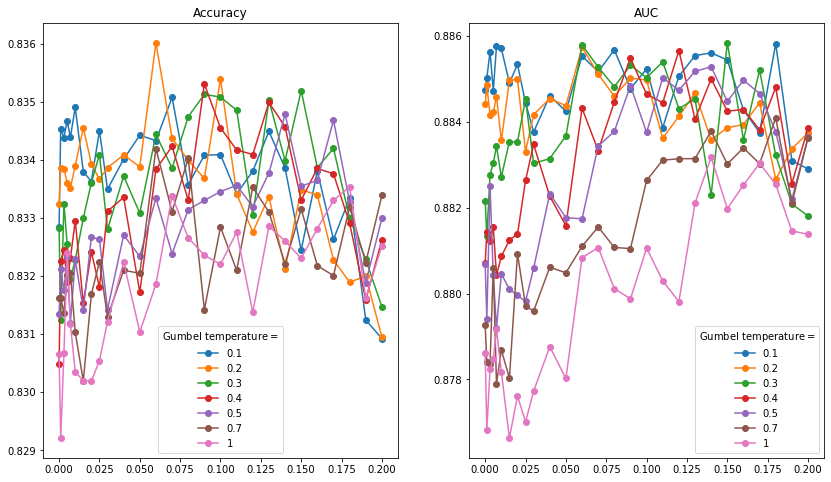

In [119]:
result_noise_and_gumbel_temp = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=noise_and_gumbel_temp_vec,
    hyperparams_name = "oh_encoding_choices",
    hyperparams_subname = ["noise_discrete_unif_max", "gumbel_temp"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_noise_and_gumbel_temp_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_noise_and_gumbel_temp.svg",
    legend_pos="best",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    legend_title= r"Gumbel temperature$=$",
    only_separate_by_color=True,
    drop_na=False,
    report_na=False,
    result_table_split_hps=True
)

In [120]:
result_noise_and_gumbel_temp.sort_values("AUC", ascending=False)

,noise_discrete_unif_max,gumbel_temp,Accuracy,AUC,SD Accuracy,SD AUC
149,0.150,0.3,0.835193,0.885845,0.002878,0.001538
168,0.180,0.1,0.833340,0.885822,0.002174,0.001533
86,0.060,0.3,0.834436,0.885794,0.002873,0.003177
28,0.007,0.1,0.834389,0.885761,0.002000,0.001931
85,0.060,0.2,0.836016,0.885739,0.002061,0.001130
...,...,...,...,...,...,...
69,0.030,1.0,0.831215,0.877726,0.002976,0.002504
55,0.020,1.0,0.830186,0.877613,0.003441,0.004131
62,0.025,1.0,0.830544,0.877008,0.001422,0.002686
13,0.001,1.0,0.829210,0.876815,0.002438,0.001815


In [6]:
leaky_relu_alpha_vec = np.round(np.arange(0, 1.01, 0.05),2).tolist()
n_synthetic_datasets_leaky_relu_alpha_comparison = 10
n_epochs_leaky_relu_alpha = 10

def create_tabGAN_for_leaky_relu_alpha(leaky_relu_alpha):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                    #leaky_relu_alpha=leaky_relu_alpha,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                   )
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_leaky_relu_alpha,
    hyperparams_vec=leaky_relu_alpha_vec,
    n_epochs=n_epochs_leaky_relu_alpha,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_leaky_relu_alpha_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "leaky_relu_alpha",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/210 [00:00<?, ?it/s]

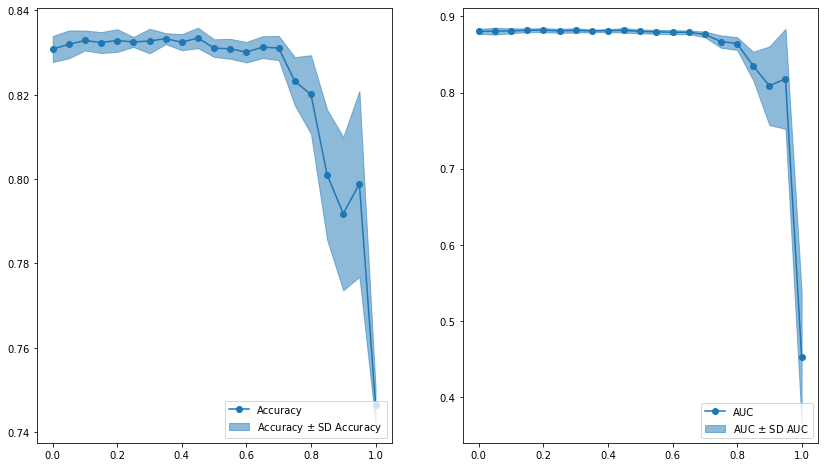

In [41]:
result_leaky_relu_alpha = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=leaky_relu_alpha_vec,
    hyperparams_name = "leaky_relu_alpha",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_leaky_relu_alpha_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_leaky_relu_alpha.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    print_csv_file_paths=False,
    plot_separate=True
)

In [8]:
result_leaky_relu_alpha

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,leaky_relu_alpha_0.0,0.830870,0.880328,0.003076,0.003199
1,leaky_relu_alpha_0.05,0.831959,0.880609,0.003313,0.004562
2,leaky_relu_alpha_0.1,0.832888,0.881096,0.002372,0.003230
3,leaky_relu_alpha_0.15,0.832397,0.881759,0.002483,0.002434
4,leaky_relu_alpha_0.2,0.832882,0.881976,0.002684,0.002586
5,leaky_relu_alpha_0.25,0.832530,0.881065,0.001185,0.002672
6,leaky_relu_alpha_0.3,0.832762,0.881652,0.002911,0.002880
7,leaky_relu_alpha_0.35,0.833320,0.880978,0.001306,0.001741
8,leaky_relu_alpha_0.4,0.832477,0.881292,0.001912,0.001935
9,leaky_relu_alpha_0.45,0.833493,0.881736,0.002429,0.002969


In [88]:
dropout_rate_critic_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() + \
                          np.round(np.arange(0.02, 0.1, 0.01), 2).tolist() +\
                          np.round(np.arange(0, 0.02, 0.001), 3).tolist()
n_synthetic_datasets_dropout_rate_critic_comparison = 10
n_epochs_dropout_rate_critic = 100

def create_tabGAN_for_dropout_rate_critic(dropout_rate_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[2], dropout_rate_critic=dropout_rate_critic)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout_rate_critic,
    hyperparams_vec=dropout_rate_critic_vec,
    n_epochs=n_epochs_dropout_rate_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout_rate_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout_rate_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/420 [00:00<?, ?it/s]

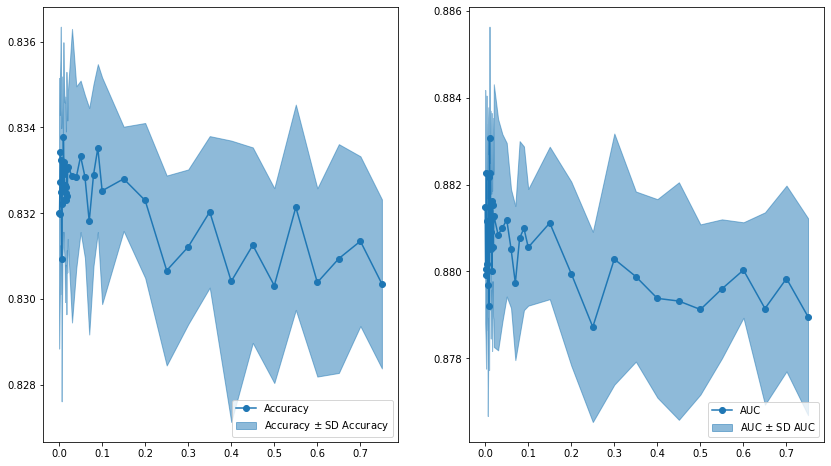

In [93]:
result_dropout_rate_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout_rate_critic_vec,
    hyperparams_name = "dropout_rate_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout_rate_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dropout_rate_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_separate=True,
    report_na=True
)

In [94]:
result_dropout_rate_critic

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,dropout_rate_critic_0.0,0.831999,0.881492,0.003156,0.002684
1,dropout_rate_critic_0.001,0.831972,0.879913,0.002316,0.001495
2,dropout_rate_critic_0.002,0.832729,0.880064,0.002475,0.002299
3,dropout_rate_critic_0.003,0.833420,0.882276,0.002165,0.001772
4,dropout_rate_critic_0.004,0.833234,0.880175,0.003118,0.001507
5,dropout_rate_critic_0.005,0.832497,0.881160,0.001489,0.002222
6,dropout_rate_critic_0.006,0.830923,0.879688,0.003311,0.003015
7,dropout_rate_critic_0.007,0.832205,0.880689,0.002273,0.002749
8,dropout_rate_critic_0.008,0.833108,0.882179,0.002087,0.001604
9,dropout_rate_critic_0.009,0.832510,0.879209,0.001220,0.001478


In [37]:
dropout_rate_generator_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() +\
                             np.round(np.arange(0, 0.1, 0.01), 2).tolist()
n_synthetic_datasets_dropout_rate_generator_comparison = 10
n_epochs_dropout_rate_generator = 100

def create_tabGAN_for_dropout_rate_generator(dropout_rate_generator):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_generator=[2], dropout_rate_generator=dropout_rate_generator)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout_rate_generator,
    hyperparams_vec=dropout_rate_generator_vec,
    n_epochs=n_epochs_dropout_rate_generator,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout_rate_generator_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout_rate_generator",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/240 [00:00<?, ?it/s]

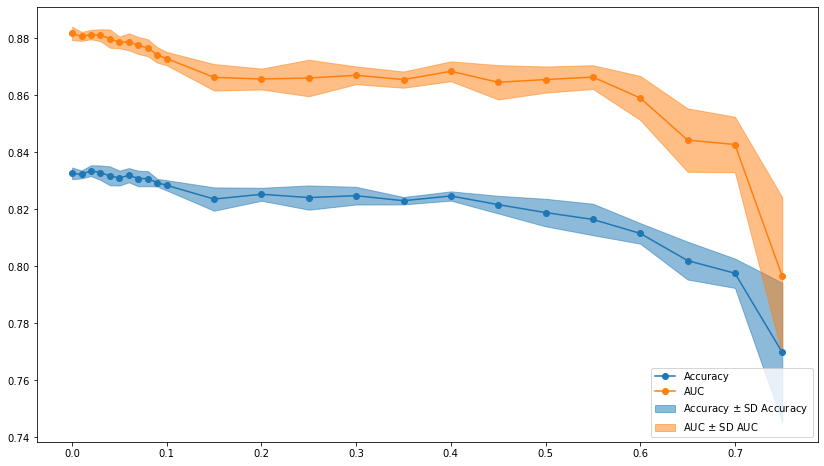

In [38]:
result_dropout_rate_generator = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout_rate_generator_vec,
    hyperparams_name = "dropout_rate_generator",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout_rate_generator_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dropout_rate_generator.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [39]:
result_dropout_rate_generator

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,dropout_rate_generator_0.0,0.832616,0.881752,0.002040,0.002329
1,dropout_rate_generator_0.01,0.832238,0.880670,0.001388,0.001567
2,dropout_rate_generator_0.02,0.833566,0.881323,0.001890,0.001631
3,dropout_rate_generator_0.03,0.832842,0.881081,0.002543,0.002083
4,dropout_rate_generator_0.04,0.831740,0.879896,0.003311,0.003191
5,dropout_rate_generator_0.05,0.830956,0.878555,0.002611,0.002057
6,dropout_rate_generator_0.06,0.831965,0.878772,0.002486,0.002979
7,dropout_rate_generator_0.07,0.830803,0.877498,0.002733,0.002980
8,dropout_rate_generator_0.08,0.830757,0.876668,0.002642,0.002984
9,dropout_rate_generator_0.09,0.829336,0.874173,0.001323,0.002713


In [95]:
dropout1_rate_critic_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() + \
                          np.round(np.arange(0.02, 0.1, 0.01), 2).tolist() +\
                          np.round(np.arange(0, 0.02, 0.001), 3).tolist()
n_synthetic_datasets_dropout1_rate_critic_comparison = 10
n_epochs_dropout1_rate_critic = 100

def create_tabGAN_for_dropout1_rate_critic(dropout1_rate_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[1], dropout_rate_critic=dropout1_rate_critic)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout1_rate_critic,
    hyperparams_vec=dropout1_rate_critic_vec,
    n_epochs=n_epochs_dropout1_rate_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout1_rate_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout1_rate_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/420 [00:00<?, ?it/s]

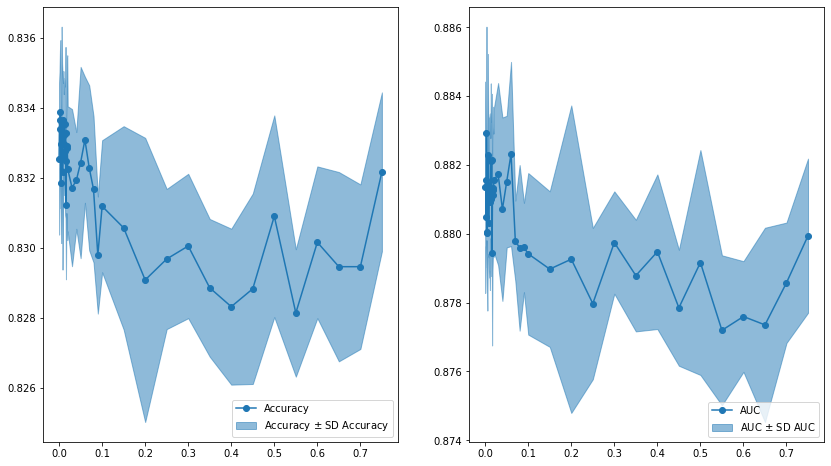

In [96]:
result_dropout1_rate_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout1_rate_critic_vec,
    hyperparams_name = "dropout1_rate_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout1_rate_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dropout1_rate_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_separate=True
)

In [97]:
result_dropout1_rate_critic

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,dropout1_rate_critic_0.0,0.832543,0.881353,0.002171,0.003071
1,dropout1_rate_critic_0.001,0.833639,0.881577,0.001375,0.001946
2,dropout1_rate_critic_0.002,0.833380,0.880487,0.002250,0.001441
3,dropout1_rate_critic_0.003,0.833884,0.882917,0.002042,0.003103
4,dropout1_rate_critic_0.004,0.832968,0.880029,0.001816,0.001537
5,dropout1_rate_critic_0.005,0.831859,0.880064,0.001726,0.002295
6,dropout1_rate_critic_0.006,0.833526,0.882278,0.002785,0.002946
7,dropout1_rate_critic_0.007,0.833599,0.881414,0.001662,0.002112
8,dropout1_rate_critic_0.008,0.832165,0.880315,0.002792,0.000889
9,dropout1_rate_critic_0.009,0.832576,0.881053,0.002133,0.002321


In [98]:
dropout0_rate_critic_vec = np.round(np.arange(0.1, 0.76, 0.05), 2).tolist() + \
                          np.round(np.arange(0.02, 0.1, 0.01), 2).tolist() +\
                          np.round(np.arange(0, 0.02, 0.001), 3).tolist()
n_synthetic_datasets_dropout0_rate_critic_comparison = 10
n_epochs_dropout0_rate_critic = 100

def create_tabGAN_for_dropout0_rate_critic(dropout0_rate_critic):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[0], dropout_rate_critic=dropout0_rate_critic)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_dropout0_rate_critic,
    hyperparams_vec=dropout0_rate_critic_vec,
    n_epochs=n_epochs_dropout0_rate_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_dropout0_rate_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "dropout0_rate_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/400 [00:00<?, ?it/s]

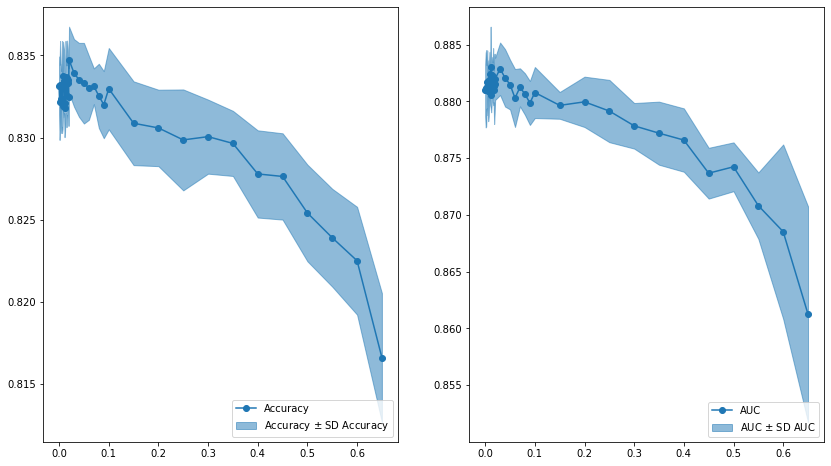

In [102]:
result_dropout0_rate_critic = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=dropout0_rate_critic_vec,
    hyperparams_name = "dropout0_rate_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_dropout0_rate_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_dropout0_rate_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_separate=True
)

In [104]:
result_dropout0_rate_critic

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,dropout0_rate_critic_0.0,0.833167,0.880967,0.001763,0.002307
1,dropout0_rate_critic_0.001,0.832145,0.881003,0.002290,0.003292
2,dropout0_rate_critic_0.002,0.833181,0.881151,0.002701,0.003363
3,dropout0_rate_critic_0.003,0.833167,0.881287,0.001345,0.001900
4,dropout0_rate_critic_0.004,0.832317,0.881667,0.002029,0.002831
5,dropout0_rate_critic_0.005,0.832344,0.881690,0.001684,0.000928
6,dropout0_rate_critic_0.006,0.833074,0.880931,0.002800,0.002673
7,dropout0_rate_critic_0.007,0.831939,0.880893,0.001425,0.002209
8,dropout0_rate_critic_0.008,0.833738,0.881861,0.002097,0.001754
9,dropout0_rate_critic_0.009,0.833413,0.882402,0.002165,0.001967


In [153]:
add_connection_vec = [(False, False), (True, False), (False, True)]
n_synthetic_datasets_add_connection_comparison = 100
n_epochs_add_connection = 100

def create_tabGAN_for_add_connection(add_connection_discrete_to_num, add_connection_num_to_discrete):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    add_dropout_critic=[0],
                   add_connection_discrete_to_num=add_connection_discrete_to_num,
                   add_connection_num_to_discrete=add_connection_num_to_discrete)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_add_connection,
    hyperparams_vec=add_connection_vec,
    n_epochs=n_epochs_add_connection,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_add_connection_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "add_connection",
    hyperparams_subname=["discrete_to_num", "num_to_discrete"],
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/300 [00:00<?, ?it/s]

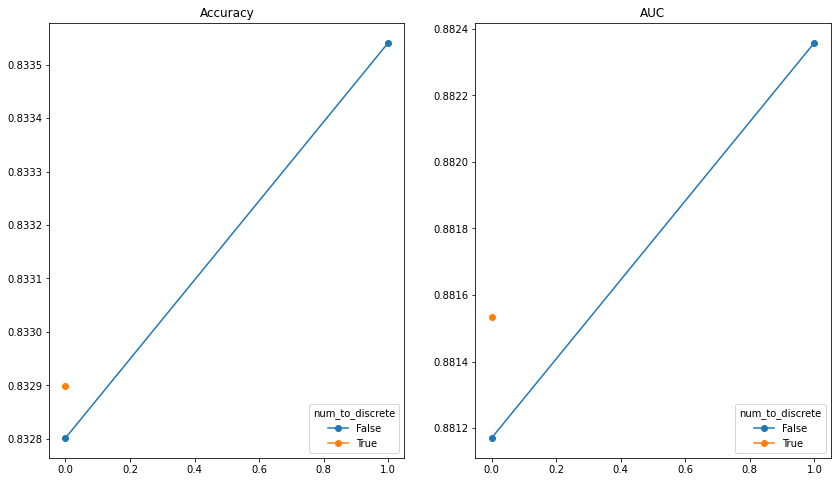

In [195]:
result_add_connection = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=add_connection_vec,
    hyperparams_name = "add_connection",
    hyperparams_subname=["discrete_to_num", "num_to_discrete"],
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_add_connection_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_add_connection.svg",
    legend_pos="lower right",
    legend_title="num_to_discrete",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_separate=True,
    only_separate_by_color=True,
    result_table_split_hps=True
)

In [196]:
result_add_connection

,discrete_to_num,num_to_discrete,Accuracy,AUC,SD Accuracy,SD AUC
0,False,False,0.832801,0.881170,0.002213,0.002374
1,False,True,0.832898,0.881534,0.002300,0.002310
2,True,False,0.833541,0.882358,0.002224,0.002276


In [377]:
tf_data_use_vec = [False, True]
n_synthetic_datasets_tf_data_use_comparison = 100
n_epochs_tf_data_use = 100

def create_tabGAN_for_tf_data_use(tf_data_use):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    tf_data_use=tf_data_use)
    return tg_qtr

  0%|          | 0/200 [00:00<?, ?it/s]

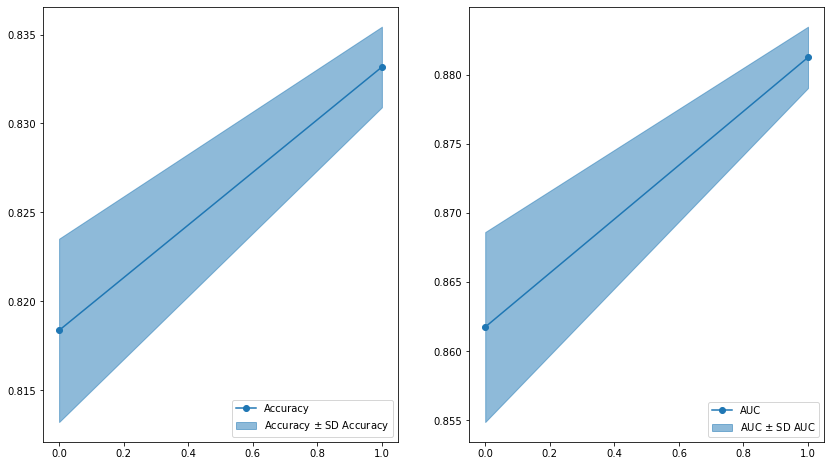

In [392]:
result_tf_data_use = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=tf_data_use_vec,
    hyperparams_name = "tf_data_use",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_tf_data_use_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_tf_data_use.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_separate=True
)

In [393]:
result_tf_data_use

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,tf_data_use_False,0.818372,0.861754,0.005152,0.006873
1,tf_data_use_True,0.833174,0.881268,0.002265,0.002220


In [394]:
batch_size_but_constant_iterations_vec = [100, 250, 500, 1000, 2500, 5000]
n_synthetic_datasets_batch_size_but_constant_iterations_comparison = 10

def create_tabGAN_for_batch_size_but_constant_iterations(batch_size):
    import math
    n_epochs = int(math.ceil(100 * batch_size / 500))
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    batch_size=batch_size,
                   default_epochs_to_train=n_epochs)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_batch_size_but_constant_iterations,
    hyperparams_vec=batch_size_but_constant_iterations_vec,
    n_epochs=None,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=None,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_batch_size_but_constant_iterations_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "batch_size_but_constant_iterations",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

  0%|          | 0/60 [00:00<?, ?it/s]

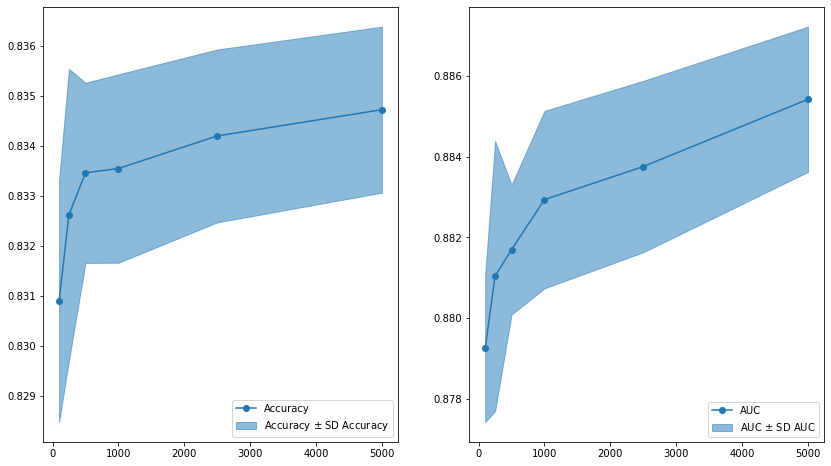

In [395]:
result_batch_size_but_constant_iterations = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=batch_size_but_constant_iterations_vec,
    hyperparams_name = "batch_size_but_constant_iterations",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_batch_size_but_constant_iterations_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_batch_size_but_constant_iterations.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_separate=True
)

In [396]:
result_batch_size_but_constant_iterations

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_but_constant_iterations_100,0.830903,0.879256,0.002421,0.001829
1,batch_size_but_constant_iterations_250,0.832623,0.881044,0.002914,0.003344
2,batch_size_but_constant_iterations_500,0.833459,0.881699,0.001800,0.001607
3,batch_size_but_constant_iterations_1000,0.833546,0.882939,0.001882,0.002199
4,batch_size_but_constant_iterations_2500,0.834197,0.883758,0.001727,0.002123
5,batch_size_but_constant_iterations_5000,0.834721,0.885425,0.001658,0.001799


In [650]:
max_quantile_share_vec = np.round(np.arange(0.3, 1.01, 0.1), 2).tolist()
n_synthetic_datasets_max_quantile_share_comparison = 10
n_epochs_max_quantile_share = 100

def create_tabGAN_for_max_quantile_share(max_quantile_share):
    n_epochs = int(math.ceil(100 * batch_size / 500))
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max,
                    max_quantile_share=max_quantile_share)
    return tg_qtr

In [ ]:
helpers.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_max_quantile_share,
    hyperparams_vec=max_quantile_share_vec,
    n_epochs=n_epochs_max_quantile_share,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_max_quantile_share_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "max_quantile_share",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    progress_bar_subsubprocess=progress_bar_subsubprocess
)

Hyperparameters subfolder creation:   0%|          | 0/8 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

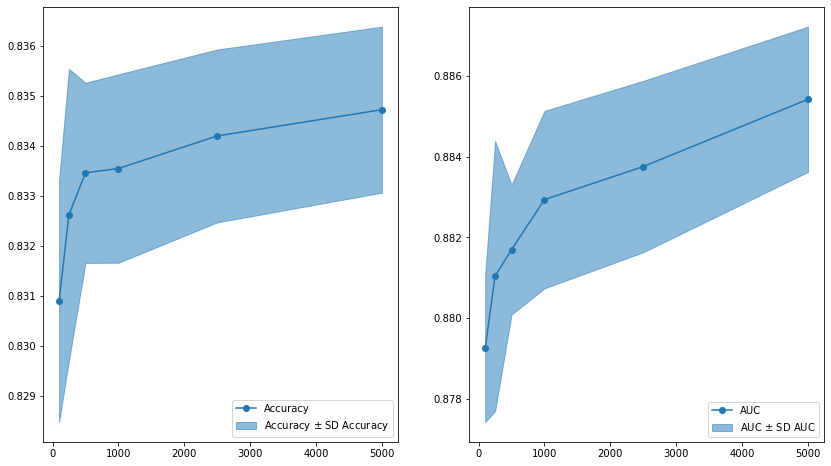

In [395]:
result_max_quantile_share = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=max_quantile_share_vec,
    hyperparams_name = "max_quantile_share",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_max_quantile_share_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_max_quantile_share.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True,
    plot_separate=True
)

In [396]:
result_max_quantile_share

,Hyperparameters,Accuracy,AUC,SD Accuracy,SD AUC
0,batch_size_but_constant_iterations_100,0.830903,0.879256,0.002421,0.001829
1,batch_size_but_constant_iterations_250,0.832623,0.881044,0.002914,0.003344
2,batch_size_but_constant_iterations_500,0.833459,0.881699,0.001800,0.001607
3,batch_size_but_constant_iterations_1000,0.833546,0.882939,0.001882,0.002199
4,batch_size_but_constant_iterations_2500,0.834197,0.883758,0.001727,0.002123
5,batch_size_but_constant_iterations_5000,0.834721,0.885425,0.001658,0.001799


In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
s

In [572]:
?QuantileTransformer

In [574]:
np.nanpercentile(np.arange(11), [10, 20, 25])

array([1. , 2. , 2.5])

In [579]:
np.maximum.accumulate([3,2,1,5,2,8, 9, 10, 2])

array([ 3,  3,  3,  5,  5,  8,  9, 10, 10])

In [625]:
d = pd.DataFrame({"a" : [1,1,1,1,1,1,1,1,1,1,1,1,6,7,8,9], "b" : [1,1,1,1,1,1,1,1,1,1,1,1,6,7,8,9]})
#d = pd.DataFrame({"a" : [1,1,1,1,1,1,1,1,1,1,1,1,6,7], "b" : [1,1,1,1,1,1,1,1,1,1,1,1,8,9]})
tr = QuantileTransformer(n_quantiles=7)

In [626]:
tr.fit_transform(d)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.81818182, 0.81818182],
       [0.86666667, 0.86666667],
       [0.93333333, 0.93333333],
       [1.        , 1.        ]])

In [627]:
tr.transform(d)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.81818182, 0.81818182],
       [0.86666667, 0.86666667],
       [0.93333333, 0.93333333],
       [1.        , 1.        ]])

In [628]:
tr.quantiles_

array([[1. , 1. ],
       [1. , 1. ],
       [1. , 1. ],
       [1. , 1. ],
       [1. , 1. ],
       [6.5, 6.5],
       [9. , 9. ]])

In [629]:
tr.references_

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ])

In [631]:
import math
import warnings
tr.fit(d)
print(tr.quantiles_)
max_share = 0.6
n_quantiles = tr.n_quantiles_
col_idx = 0

max_n_quantiles_per_value = math.floor(n_quantiles * max_share)
print("max quantiles", max_n_quantiles_per_value)
if max_n_quantiles_per_value == 0:
    warnings.warn(f"You have chose a max_share={max_share} along with n_quantiles={n_quantiles} such that the maximum number of categories per unique value is less than 1. This is automatically changed such that maximum number of categories per unique value is equal to 1.")
    max_n_quantiles_per_value = 1
col_unique_values, col_value_counts = np.unique(tr.quantiles_[:, col_idx], return_counts=True)
col_percentages = col_value_counts / sum(col_value_counts)
print("col_percentages", col_percentages)
if max(col_percentages) > max_share:
    indices_too_common_values = np.where(col_percentages > max_share)[0]
    print("Too common values:", col_unique_values[indices_too_common_values])
    # Freeing up available quantile spaces from values that are too common
    # (have a larger share than permitted by the parameter max_share)
    col_bool_remaining_values = np.ones(d["a"].shape[0], dtype=bool)
    for curr_common_value_idx in indices_too_common_values:
        curr_common_value = col_unique_values[curr_common_value_idx]
        curr_common_value_count = col_value_counts[curr_common_value_idx]
        print("curr_common_value:", curr_common_value, "n_new_avail_quantiles", n_new_avail_quantiles)
        curr_avail_quantile_indices = np.nonzero(
            np.isclose(tr.quantiles_[:, col_idx], curr_common_value)
        )[0][max_n_quantiles_per_value:]
        print("curr_avail_ind", curr_avail_quantile_indices)
        tr.quantiles_[curr_avail_quantile_indices, col_idx] = np.nan
        col_bool_remaining_values *= np.logical_not(np.isclose(d["a"], curr_common_value))
        
    
    # Reset the quantile spaces for values with shares smaller than the parameter max_share, before a redraw
    indices_less_common = np.where(col_percentages <= max_share)
    values_less_common = col_unique_values[indices_less_common]
    for curr_less_common_value in values_less_common:
        print("curr_less_common_value", curr_less_common_value)
        tr.quantiles_[np.nonzero(np.isclose(tr.quantiles_, curr_less_common_value))[0], col_idx] = np.nan
    
    print(tr.quantiles_)
    
    available_quantile_indices = np.where(np.isnan(tr.quantiles_))[0]
    n_available_quantiles = len(available_quantile_indices)
    print("Available quantile indices", available_quantile_indices)
    print("n_available_quantiles:", n_available_quantiles)
    
    print(col_bool_remaining_values)
    col_remaining_values = d["a"].loc[col_bool_remaining_values].to_numpy()
    print(col_remaining_values)
    if col_remaining_values.shape[0] != n_available_quantiles:
        tr.quantiles_[available_quantile_indices, col_idx] = np.nanpercentile(col_remaining_values,
                                                                              q=np.linspace(0, 100, n_available_quantiles))
    else:
        print("equal")
        tr.quantiles_[available_quantile_indices, col_idx] = col_remaining_values
    
    tr.quantiles_[:, col_idx] = np.sort(tr.quantiles_[:, col_idx])

print(tr.quantiles_)

[[1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [6.5 6.5]
 [9.  9. ]]
max quantiles 4
percentages [0.71428571 0.14285714 0.14285714]
Too common values: [1.]
curr_common_value: 1.0 n_new_avail_quantiles 5
curr_avail_ind [4]
curr_less_common_value 6.499999999999998
curr_less_common_value 9.0
[[1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [nan 1. ]
 [nan 6.5]
 [nan 9. ]]
Available quantile indices [4 5 6]
n_available_quantiles: 3
[False False False False False False False False False False False False
  True  True  True  True]
[6 7 8 9]
[[1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [6.  1. ]
 [7.5 6.5]
 [9.  9. ]]


In [623]:
a = [1,2,3,4,5,6,7,8,9]
np.nanpercentile(a, np.linspace(0, 100, 80))

array([1.        , 1.10126582, 1.20253165, 1.30379747, 1.40506329,
       1.50632911, 1.60759494, 1.70886076, 1.81012658, 1.91139241,
       2.01265823, 2.11392405, 2.21518987, 2.3164557 , 2.41772152,
       2.51898734, 2.62025316, 2.72151899, 2.82278481, 2.92405063,
       3.02531646, 3.12658228, 3.2278481 , 3.32911392, 3.43037975,
       3.53164557, 3.63291139, 3.73417722, 3.83544304, 3.93670886,
       4.03797468, 4.13924051, 4.24050633, 4.34177215, 4.44303797,
       4.5443038 , 4.64556962, 4.74683544, 4.84810127, 4.94936709,
       5.05063291, 5.15189873, 5.25316456, 5.35443038, 5.4556962 ,
       5.55696203, 5.65822785, 5.75949367, 5.86075949, 5.96202532,
       6.06329114, 6.16455696, 6.26582278, 6.36708861, 6.46835443,
       6.56962025, 6.67088608, 6.7721519 , 6.87341772, 6.97468354,
       7.07594937, 7.17721519, 7.27848101, 7.37974684, 7.48101266,
       7.58227848, 7.6835443 , 7.78481013, 7.88607595, 7.98734177,
       8.08860759, 8.18987342, 8.29113924, 8.39240506, 8.49367

In [604]:
tr.subsample_

AttributeError: 'QuantileTransformer' object has no attribute 'subsample_'

In [531]:
a = [1, 3, 2, 1]
b = [1,2,3,4]

In [536]:
np.array(a)[np.argsort(a)]

array([1, 1, 2, 3])

In [537]:
np.array(b)[np.argsort(a)]

array([1, 4, 3, 2])

In [523]:
x = np.array([0,1,1,1,1,1,1,2,3,4, np.nan])
y = np.array([1,2,3,4,5,6,7,8,9,10, np.nan])
x_new = np.array([0,0.5, 1, 1.5,2,3,4])
y_new = 0.5*(np.interp(x_new, x, y) - np.interp(-x_new, -x[::-1], -y[::-1]))
y_new2 = np.interp(x_new, x, y)
#print(y_new)

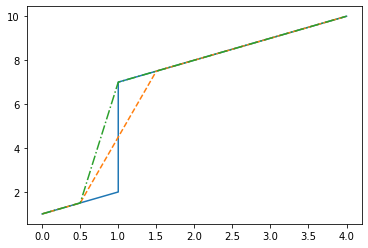

In [524]:
plt.plot(x,y)
plt.plot(x_new, y_new, linestyle="--")
plt.plot(x_new, y_new2, linestyle="-.")

array([0, 2])

In [278]:
tr.references_

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [273]:
tr.quantiles_ = np.array([1,1,6,7]).reshape((4,1))
tr.references_ = np.linspace(0,1,4)

In [238]:
np.linspace(0,1,4).reshape((4,1))

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

In [274]:
tr.transform(d)

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.66666667],
       [1.        ]])

In [643]:
tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5, tf_data_use=True, max_quantile_share=0.5,
               add_connection_discrete_to_num=True)
tg_qtr.train(100, batch_size=500, restart_training=True, progress_bar=True)

Fix quantile share
Column capital.gain [0.915 0.001 0.001 0.001 0.001 0.001 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.003 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.002 0.001 0.001 0.001 0.001 0.002 0.003 0.001 0.001 0.008 0.001
 0.009 0.002 0.002 0.001 0.001 0.001 0.012 0.001 0.001 0.001 0.005]
Column capital.loss [0.952 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.002 0.001 0.006 0.006 0.001 0.005 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.001 0.001]


  0%|          | 0/100 [00:00<?, ?it/s]

In [644]:
acc, auc, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(tg_qtr.generate_dataset(), data_test, categories=cats)

(0.8278220451527224, 0.8759465169394748)

In [161]:
acc, auc, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(tg_qtr.generate_dataset(), data_test, categories=cats)

(0.8282204515272245, 0.875224126855729)

In [123]:
acc, auc, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(tg_qtr.generate_dataset(), data_test, categories=cats)

(0.8125498007968127, 0.8564813713361249)

In [125]:
acc, auc, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(tg_qtr.generate_dataset(), data_test, categories=cats)

(0.8175298804780876, 0.8657954058812334)

In [167]:
tg_qtr.generate_dataset()

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,54.000000,Private,122037.750000,Masters,13.0,Never-married,Prof-specialty,White,Female,0.0,0.0,50.000000,US,<=50K
1,50.040043,Self-emp-inc,168597.000000,Some-college,10.0,Divorced,Sales,White,Female,0.0,0.0,3.107639,US,<=50K
2,52.000000,Private,206640.515625,Some-college,9.0,Married,Sales,White,Male,99999.0,0.0,40.000000,US,<=50K
3,47.000000,Private,199492.281250,HS-grad,9.0,Never-married,Handlers-cleaners,White,Male,0.0,0.0,40.000000,US,<=50K
4,53.000000,Private,166967.437500,<=12th,5.0,Married,Craft-repair,White,Male,0.0,0.0,40.000000,US,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,28.000000,Private,264997.156250,HS-grad,9.0,Divorced,Sales,White,Female,0.0,0.0,40.000000,US,<=50K
30158,27.000000,Private,256666.031250,HS-grad,9.0,Divorced,Adm-clerical,White,Female,0.0,0.0,40.000000,US,<=50K
30159,35.000000,Private,306644.062500,HS-grad,9.0,Married,Craft-repair,White,Male,0.0,0.0,40.000000,US,<=50K
30160,37.000000,Government,238166.078125,Assoc-voc,13.0,Married,Protective-serv,White,Male,0.0,0.0,40.000000,US,<=50K


In [175]:
data_train["education"].unique()

array(['Bachelors', 'HS-grad', '<=12th', 'Masters', 'Some-college',
       'Assoc-acdm', 'Doctorate', 'Assoc-voc', 'Prof-school'],
      dtype=object)

In [174]:
data_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational.num',
       'marital.status', 'occupation', 'race', 'gender', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [187]:
data_train.loc[data_train["education"] == "Doctorate"]

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
19,40,Private,193524,Doctorate,16,Married,Prof-specialty,White,Male,0,0,60,US,>50K
58,42,Private,116632,Doctorate,16,Married,Prof-specialty,White,Male,0,0,45,US,>50K
82,43,Government,410867,Doctorate,16,Never-married,Prof-specialty,White,Female,0,0,50,US,>50K
88,48,Self-emp-not-inc,191277,Doctorate,16,Married,Prof-specialty,White,Male,0,1902,60,US,>50K
175,58,Government,109567,Doctorate,16,Married,Prof-specialty,White,Male,0,0,1,US,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29911,54,Government,34832,Doctorate,16,Married,Exec-managerial,White,Male,0,0,60,US,>50K
29944,48,Private,123075,Doctorate,16,Married,Prof-specialty,White,Male,0,0,45,US,>50K
30043,51,Government,203334,Doctorate,16,Divorced,Exec-managerial,White,Female,0,0,45,US,>50K
30082,50,Private,485710,Doctorate,16,Divorced,Prof-specialty,White,Female,0,0,50,US,<=50K


In [191]:
tg_qtr.use_critic_on_data(data_train.loc[data_train["education"] == "Doctorate"])

array([[3.0769346],
       [2.9747078],
       [3.3746464],
       [5.988382 ],
       [2.6207826],
       [3.952836 ],
       [3.1417742],
       [3.269031 ],
       [3.149459 ],
       [3.2282727],
       [3.3041584],
       [3.9462166],
       [2.8813996],
       [3.1863499],
       [5.960988 ],
       [6.0801897],
       [3.35855  ],
       [3.8744926],
       [3.5473475],
       [3.0627406],
       [3.1734862],
       [3.0509434],
       [3.0837884],
       [3.1556065],
       [3.1078913],
       [3.4666471],
       [3.4487433],
       [3.018309 ],
       [3.0634847],
       [2.8222408],
       [3.3264103],
       [4.0875497],
       [3.9955482],
       [2.9220502],
       [2.89858  ],
       [6.6202073],
       [3.525734 ],
       [3.200973 ],
       [6.6288724],
       [3.0032473],
       [3.6996136],
       [3.445135 ],
       [3.9839225],
       [3.0898657],
       [2.9742055],
       [2.7659478],
       [3.0913115],
       [3.0824685],
       [5.889976 ],
       [6.5059733],


In [192]:
tg_qtr.use_critic_on_data(data_train)

array([[2.7007918 ],
       [0.16986123],
       [0.49571353],
       ...,
       [0.40338457],
       [0.49639624],
       [3.9769833 ]], dtype=float32)

In [193]:
data_train

,age,workclass,fnlwgt,education,educational.num,marital.status,occupation,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,Government,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,US,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,US,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,US,<=50K
3,53,Private,234721,<=12th,7,Married,Handlers-cleaners,Black,Male,0,0,40,US,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Non-US,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,257302,Assoc-acdm,12,Married,Tech-support,White,Female,0,0,38,US,<=50K
30158,40,Private,154374,HS-grad,9,Married,Machine-op-inspct,White,Male,0,0,40,US,>50K
30159,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,US,<=50K
30160,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,US,<=50K
